Exercises For Data Basics Day 2

EXERCISE 1- Exploring and summarizing data - head, describe, sample. shape. mean. value_counts. sum. median. std. var. etc. dtypes.

 Analyzing PGH tree data with descriptive statistics.

What is the average height and width of PGH trees.

ON what street is the tallest tree?

In what neighborhood is the widest tree?

What is the tallest type of tree in pittsburgh on average?

In [20]:
import pandas as pd

#First step read csv into dataframe 
tree_data = pd.read_csv("Tree_data.csv")

#do we really need an index column 

c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
tree_data.shape

(45310, 59)

In [22]:
tree_data.head()

,_id,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,6201,494907651,667,PENN AVE,Ginkgo,Ginkgo biloba,18.0,9.0,5.0,5.0,...,Central Business District,6.0,2.0,42003020100,6.0,2.0,2.0,1-3,40.443243,-80.000526
1,6202,1094044963,201,S LEXINGTON ST,Sweetgum: American,Liquidambar styraciflua,40.0,10.0,4.0,4.0,...,Point Breeze,9.0,14.0,42003140600,3.0,14.0,4.0,3-14,40.447554,-79.900169
2,6203,292899507,201,S LEXINGTON ST,Pagodatree: Japanese,Sophora japonica,25.0,12.0,99.0,99.0,...,Point Breeze,9.0,14.0,42003140600,3.0,14.0,4.0,3-14,40.447247,-79.899926
3,6204,1474662812,211,S LEXINGTON ST,Birch: River,Betula nigra,35.0,6.0,99.0,99.0,...,Point Breeze,9.0,14.0,42003140600,3.0,14.0,4.0,3-14,40.447159,-79.899924
4,41402,1756120617,3037,ZEPHYR AVE,Vacant Site Small,Vacant Site Small,NaN,NaN,NaN,NaN,...,Sheraden,2.0,20.0,42003562500,5.0,20.0,6.0,1-16,40.457238,-80.054393


In [23]:
#What is the average height of Pittsburgh Trees?

tree_height_mean = tree_data["height"].mean()

print("The average height of trees in Pittsburgh is", "{:.2f}".format(tree_height_mean), "feet")


The average height of trees in Pittsburgh is 22.16 feet


In [24]:
#What is the average width of Pittsburgh trees?

tree_width_mean = tree_data["width"].mean()

print("The average width of trees in Pittsburgh is", "{:.2f}".format(tree_width_mean), "feet")

The average width of trees in Pittsburgh is 6.99 feet


In [ ]:
#tree_data.sort_values('height', ascending=False)

In [28]:
#On what street is the tallest tree?
tallest_tree = tree_data["height"].idxmax()

#print("The tallest tree is on", tree_data.loc[tallest_tree]["street"])

tree_data.loc[tallest_tree]["street"]

'39TH ST'

In [ ]:
#In what neighborhood is the widest tree?

In [ ]:
tree_data.sort_values['width', ascending=False)



In [33]:
#Find the widest tree
print("The widest tree is in",tree_data.loc[tree_data["width"].idxmax()]["neighborhood"])

The widest tree is in Highland Park


-
-
-
-
-
-
-
-
-



Making plots to see what your data look like - 1D data - histogram. 2D data - bar.line. scatter plot. time series?

EXERCISE - Plotting fake stock market data.


Make a line chart of each stock value over time.

In [90]:
#Here we've created fake stock market data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

stocks = pd.DataFrame({ 
    'ticker':np.repeat( ['aapl','goog','yhoo','msft'], 25 ),
    'date':np.tile( pd.date_range('1/1/2011', periods=25, freq='D'), 4 ),
    'price':(np.random.randn(100).cumsum() + 10) })


In [92]:
apple = stocks['ticker'] == 'aapl'
google = stocks['ticker'] == 'goog'
yahoo = stocks['ticker'] == 'yhoo'
microsoft = stocks['ticker'] == 'msft'

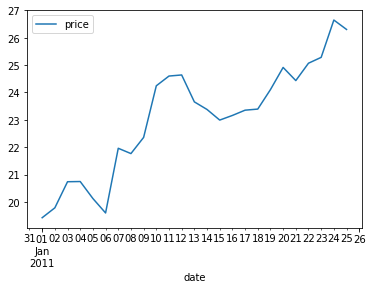

In [98]:
stocks[google].plot(x="date", y="price")

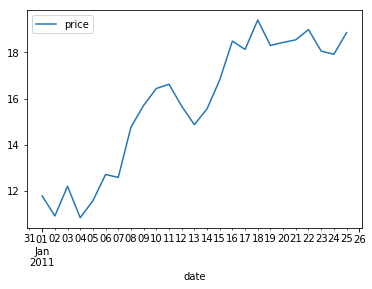

In [99]:
stocks[apple].plot(x="date", y="price")

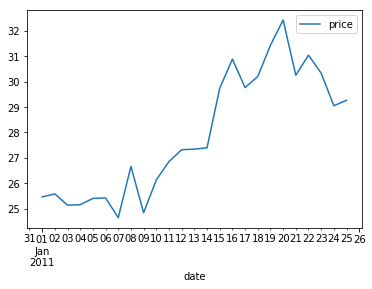

In [100]:
stocks[yahoo].plot(x="date", y="price")

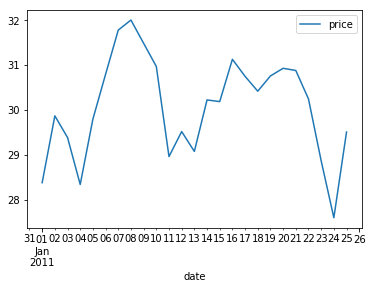

In [101]:
stocks[microsoft].plot(x="date", y="price")

-
-
-
-
-
-
-
-
-
-
-
-

Split Apply Combine. groupby.

EXERCISE - 311 Data. Tree data.

What neightborhood complains the most?



In [46]:
data_311 = pd.read_csv('311_data.csv')

In [47]:
data_311.head()

,_id,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
0,208378,220546,2018-02-16T09:53:00,Potholes,Call Center,1,DPW - Street Maintenance,Banksville,2.0,20.0,4.200320e+10,5.0,20.0,6.0,4-9,-80.042757,40.406525,EXACT
1,265742,278835,2018-08-09T12:39:00,Sidewalk Obstruction,Twitter,0,DOMI - Permits,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,-79.999409,40.453625,EXACT
2,265731,278825,2018-08-09T12:07:00,"Litter Can, Public",Report2Gov iOS,3,DPW - Street Maintenance,Shadyside,8.0,7.0,4.200307e+10,2.0,7.0,4.0,2-23,-79.947403,40.453243,EXACT
3,265740,278833,2018-08-09T12:36:00,Hydrant,Twitter,1,Pittsburgh Water and Sewer Authority,Central Lawrenceville,7.0,9.0,4.200309e+10,2.0,9.0,2.0,3-5,-79.959508,40.477157,EXACT
4,265741,278834,2018-08-09T12:37:00,Early Set Out,Call Center,1,DPW - Refuse,Marshall-Shadeland,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,-80.027506,40.470529,APPROXIMATE


In [74]:
data_311.groupby('NEIGHBORHOOD').size()




NEIGHBORHOOD
Allegheny Center               993
Allegheny West                 512
Allentown                     2973
Arlington                     1953
Arlington Heights               59
Banksville                    1853
Bedford Dwellings              597
Beechview                     6469
Beltzhoover                   2331
Bloomfield                    7091
Bluff                         1525
Bon Air                        782
Brighton Heights              3829
Brookline                    10944
California-Kirkbride           864
Carrick                      10221
Central Business District     5792
Central Lawrenceville         5218
Central Northside             2838
Central Oakland               3099
Chartiers City                 309
Chateau                        486
Crafton Heights               2225
Crawford-Roberts              1752
Duquesne Heights              1891
East Allegheny                3411
East Carnegie                  236
East Hills                    2250
East Li

In [73]:
print(data_311['NEIGHBORHOOD'].value_counts().idxmax(), data_311['NEIGHBORHOOD'].value_counts().max())

Brookline 10944


-
-
-
-
-
-
-
-
-
-
-
-
-
-

Querying and subsetting - Masking. Variables

EXERCISE - time indexing and subsetting data and visuzlaing that subset

Create a sub dataset of just the potholes in a neighborhood

Create a plot of number of pothole complaints per month of that data subset

In [62]:
#Create a sub dataset of just the potholes in Highland Park 
potholes = data_311['REQUEST_TYPE'] == "Potholes"

highland_park= data_311['NEIGHBORHOOD'] == "Highland Park"




In [63]:

highlandpark_potholes = data_311[potholes & highland_park]

print(highlandpark_potholes.shape)
highlandpark_potholes.head()

(841, 18)


,_id,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
39,207609,219773,2018-02-15 08:21:00,Potholes,Report2Gov Android,1,DOMI - Streets,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,-79.922092,40.474525,EXACT
269,209826,221997,2018-02-19 22:28:00,Potholes,Website,1,DPW - Street Maintenance,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,-79.926712,40.472106,EXACT
699,266123,279201,2018-08-10 13:15:00,Potholes,Website,0,DPW - Street Maintenance,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,-79.926332,40.472210,EXACT
1055,220974,233370,2018-03-27 14:06:00,Potholes,Call Center,1,DPW - Street Maintenance,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,-79.916207,40.477545,EXACT
1074,221264,233827,2018-03-29 08:56:00,Potholes,Twitter,1,DPW - Street Maintenance,Highland Park,7.0,10.0,4.200310e+10,2.0,10.0,5.0,3-7,-79.920057,40.487827,EXACT


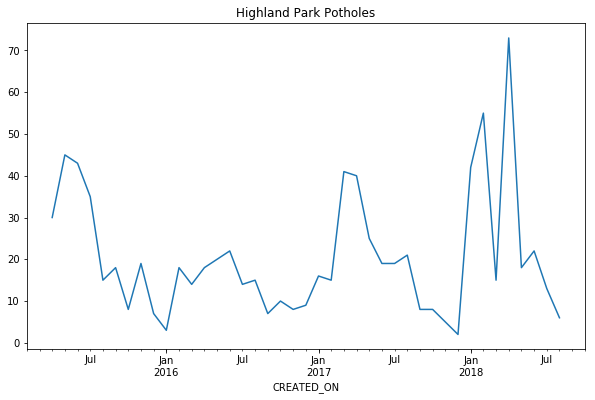

In [79]:
#Plot the number of pothole compaints per month of that data set


#Change created on to a date-time object 
#WHERE SHOULD WE PUT THIS????
data_311['CREATED_ON'] = pd.to_datetime(data_311['CREATED_ON'])

#Change the index to a date time object 
highlandpark_potholes.index = highlandpark_potholes['CREATED_ON']


#Plot the figure 
highlandpark_potholes['REQUEST_ID'].resample("M").count().plot(title="Highland Park Potholes", figsize=(10,6))